In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('synthetical_dataset.csv')
data.head(5)

,Index,Address,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,FLAG
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,704785.63,1,0,95.897539,0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,1218216.73,1,0,100.000000,0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,516729.30,3,0,95.055751,0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,397555.90,2,0,97.410889,0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,382472.42,1,0,92.543958,0


In [13]:
from Crypto.Hash import keccak

def hash_address(address):
    keccak_hash = keccak.new(digest_bits=256)
    keccak_hash.update(address.encode())
    decimal_address = int(keccak_hash.hexdigest(), 16)
    return decimal_address

data['Address'] = data['Address'].apply(hash_address)
data['Address']

0       1029047895622181677082469178525025497239514033...
1       4815723412368990051845724797393104504732869074...
2       2267735954664873608345593168102949699911173861...
3       4816189373093903701735752654589308415626257088...
4       1075129388385622703205300713771774172281445551...
                              ...                        
9836    9796640894092615620455712647689124977578652145...
9837    1161781100425295333303255116631183873055342538...
9838    3258899527227816394779062129406231769231685409...
9839    6495764806995869469487631250138285433318644209...
9840    1808180123772589239611473807552879038033015564...
Name: Address, Length: 9841, dtype: object

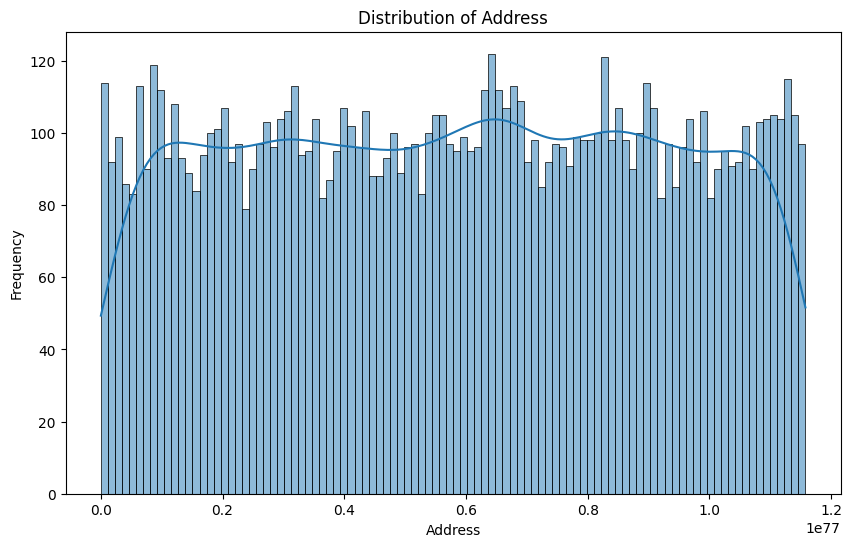

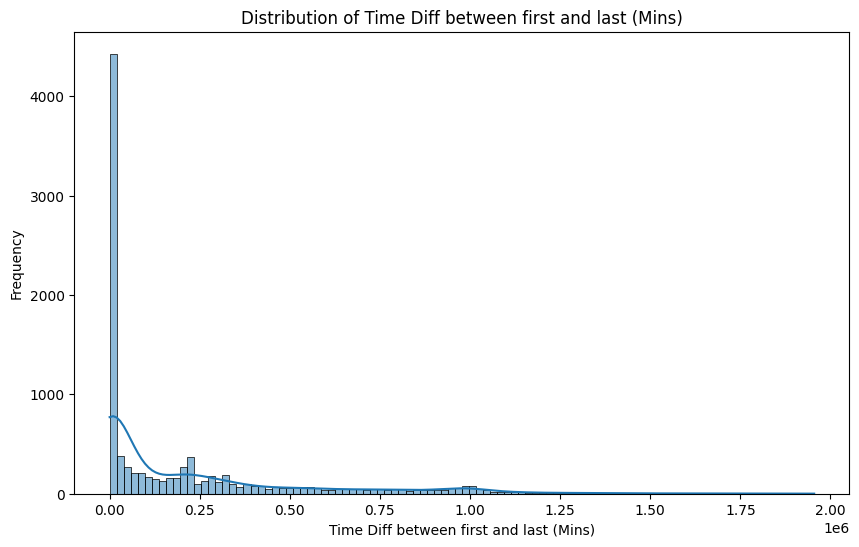

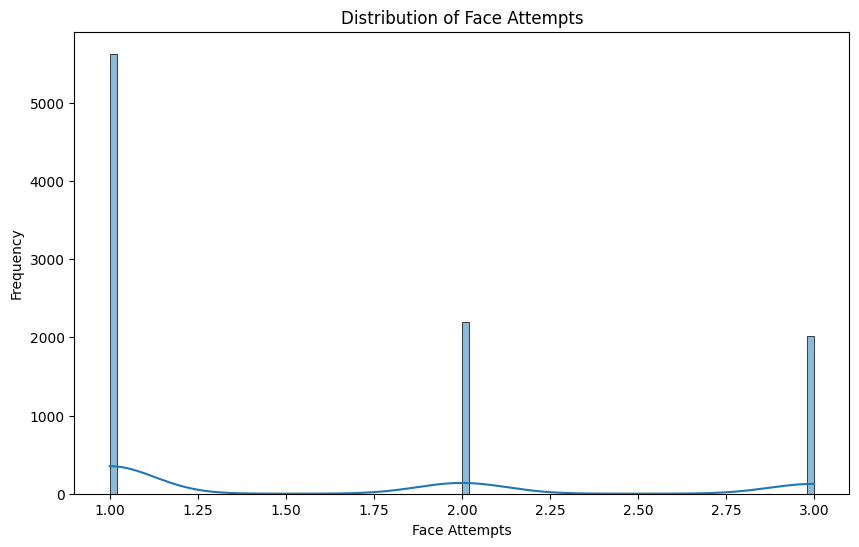

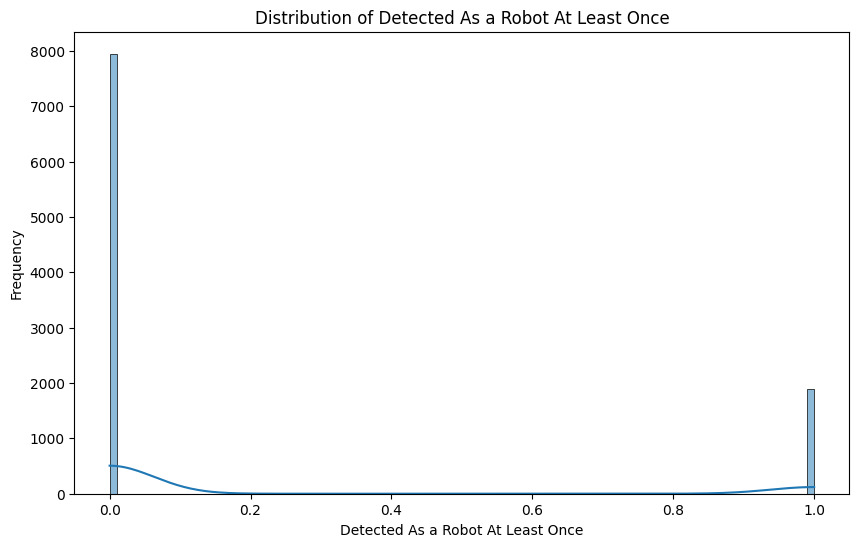

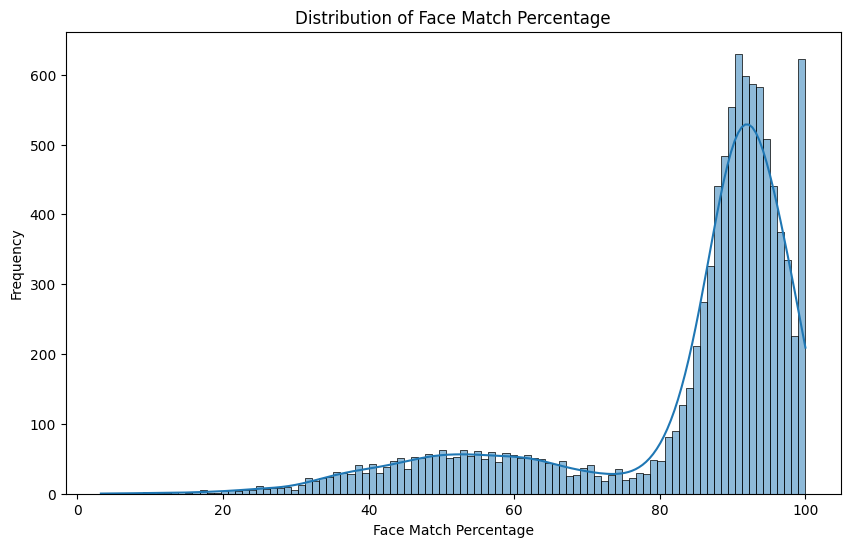

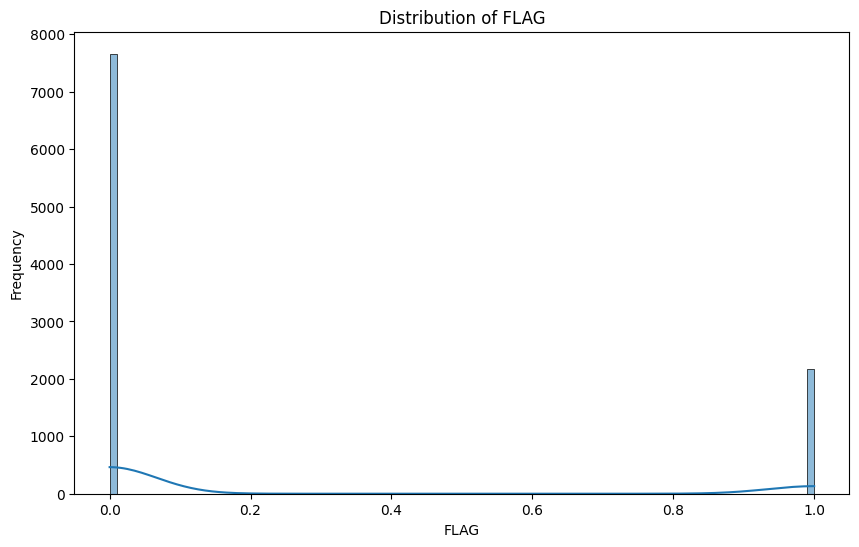

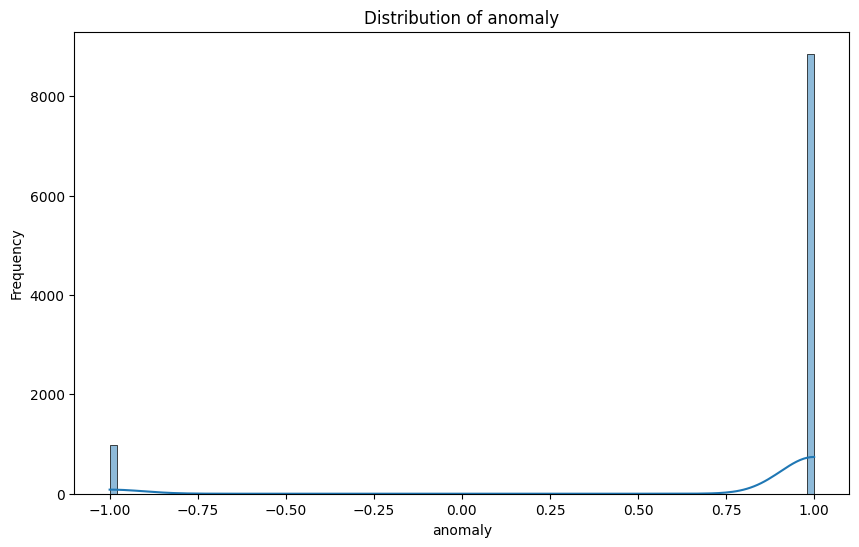

In [15]:
import matplotlib.pyplot as plt

cols = data.drop(columns=['Index']).columns
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [14]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data)

data['anomaly'] = model.predict(data)

data['anomaly'].value_counts()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


anomaly
 1    8857
-1     984
Name: count, dtype: int64